If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [1]:
#!pip3 install scikit-learn==1.3.2

In [12]:
import sklearn
import numpy as np
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


## SVM

In [13]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

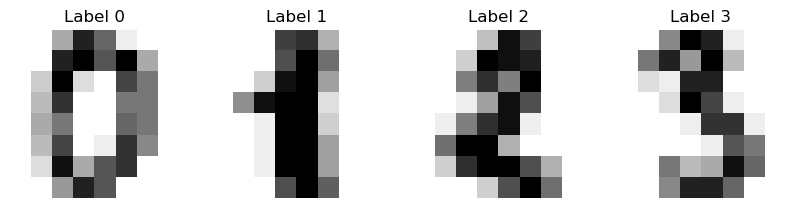

In [14]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

In [15]:
# flatten the images
n = len(digits.images)
D = digits.images.reshape((n, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
D_train, D_test, y_train, y_test = train_test_split(
    D, y, test_size=0.3, shuffle=False
)

In [16]:
D_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ...,  3.,  0.,  0.],
       [ 0.,  7., 16., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Exercise a 

Train an RBF kernel SVM with parameters gamma=0.0005, C=0.9. Use the SVC SVM model from sklearn to do so. Train the model on the D_train dataset (70-30 split) and test the model on the D_test dataset. What is the accuracy of the model on the test data?

In [17]:
from sklearn.svm import SVC

gamma = 0.0005
C= 0.9

# SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=gamma, C=C)

# Train model on training data
svm_model.fit(D_train, y_train)

# Predict labels for test data
y_pred = svm_model.predict(D_test)

# Accuracy of model
accuracy = svm_model.score(D_test, y_test)

accuracy

0.9555555555555556

### Exercise c

In [18]:
# Get the amount of support vectors per class
n_support_vectors_per_class = svm_model.n_support_
print(n_support_vectors_per_class)

# Get the class labels
class_labels = svm_model.classes_

# Print the mapping between class indices and class labels
num_support_vectors_0_1 = n_support_vectors_per_class[0] + n_support_vectors_per_class[1]
print(num_support_vectors_0_1)

[38 71 55 64 52 57 41 61 81 81]
109


### Exercise d

109


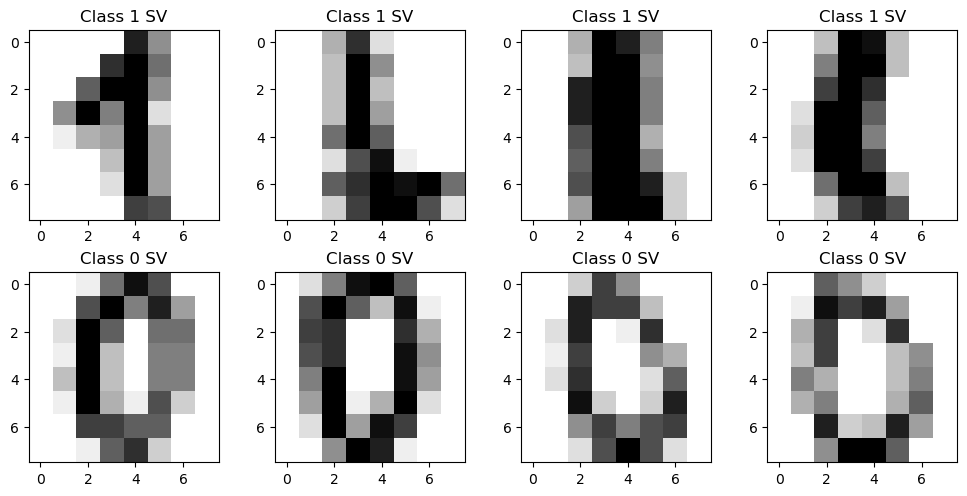

In [22]:
# Get support vectors
support_vectors = svm_model.support_vectors_

# Get the indices and labels of the support vectors
support_vector_indices = svm_model.support_
support_vector_labels = y_train[svm_model.support_]

# Find the support vectors for classes 0 and 1
class_0_indices = support_vector_indices[support_vector_labels == 0]
class_1_indices = support_vector_indices[support_vector_labels == 1]

# Number of support vectors
print(len(class_0_indices) + len(class_1_indices))

# Get dual coefficients
dual_coef = svm_model.dual_coef_

# Sort the dual coefficients to find the most influential support vectors
class_0_indices_sorted = np.argsort(np.abs(dual_coef[0, support_vector_labels == 0]))
class_1_indices_sorted = np.argsort(np.abs(dual_coef[0, support_vector_labels == 1]))

# Select four most influential support vectors for each class
top_sv_class_0 = class_0_indices[class_0_indices_sorted[:4]]
top_sv_class_1 = class_1_indices[class_1_indices_sorted[:4]]

# Plotting the most influential support vectors for each class
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

for ax, sv_index in zip(axes[0], top_sv_class_1):
    ax.imshow(D_train[sv_index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Class 1 SV")

for ax, sv_index in zip(axes[1], top_sv_class_0):
    ax.imshow(D_train[sv_index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Class 0 SV")

plt.tight_layout()
plt.show()

### Exercise e
Use the sklearn function GridSearchCV to determine the best combination for the parameters gamma and C according to a 5-fold cross validation of the SVC SVM with RBG kernel. Train the model on the whole dataset D, not just D_train. Use as the scoring method the accuracy and set as the candidate parameters $gamma \in \{0.0001,0.0005,0.001,0.005\}$ and $C \in \{0.6,0.8,1,2,4\}$.

The code below is implemented according to the documentation for GridSearchCV, source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV


In [10]:
from sklearn.model_selection import GridSearchCV

# Define param grid
param_grid = {'gamma': [0.0001, 0.0005, 0.001, 0.005], 'C': [0.6, 0.8, 1, 2, 4]}

# SVM model with RBF kernel
svm_model = SVC(kernel='rbf')

# Use GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to D
grid_search.fit(D, y)

# Get best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(best_params, best_accuracy)

{'C': 4, 'gamma': 0.0005} 0.9744073042401734
